# DATA EXPLORATION - Advanced study of epigenetic mechanisms in the development of neoplasms 

In this notebook, the goal is to **gain an initial understanding of the medical and biological concepts** by **exploring and visualizing the data** in its raw form, allowing me to examine its structure and fundamental characteristics.


### Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation
import warnings

## Overview of Cancer, Breast Cancer, and the Role of DNA Methylation

**Cancer** encompasses a group of more than one hundred diseases characterized by the **uncontrolled division and proliferation of cells** within the body. These conditions can arise in almost every tissue and share common biological mechanisms underlying their development and progression. Cancer originates when a single cell **loses the regulatory controls** that normally govern its division, resulting in **unrestricted cellular proliferation** and the formation of an abnormal mass of cells known as a **tumor**. Depending on its behavior, a tumor can remain **localized** to its original tissue (in situ cancer) or **invade** surrounding tissues and spread through the **bloodstream** or **lymphatic system**, forming **metastases** in distant organs **[1]**.

A tumor or **neoplasm**—from the Greek *neo-* (“new”) and *-plasis* (“formation”)—refers to this abnormal and excessive growth of tissue **[2]**. **Neoplasms** are broadly classified as **benign** or **malignant**. **Benign neoplasms**, such as *fibroids* and *adenomas*, are non-cancerous and typically remain confined, though they can cause complications depending on their location or size. **Malignant neoplasms**, in contrast, exhibit the capacity to **invade surrounding tissues** and **metastasize**, and are therefore considered **cancers**. The transition from a benign to a malignant state is usually driven by **genetic mutations** that alter the normal regulation of cell division, leading to uncontrolled cell proliferation.

**Cancer becomes life-threatening when tumor growth interferes with essential organs or physiological functions.** Advances in molecular biology have significantly deepened our understanding of cancer by enabling detailed analyses of cellular and genetic alterations. This knowledge has driven the development of innovative diagnostic tools, preventive measures, and targeted therapeutic strategies that address the molecular underpinnings of cancer **[1]**.

Among the various cancer types, **breast cancer** is the **most commonly diagnosed malignancy in women** and the **second leading cause of cancer-related mortality** worldwide **[3]**. Anatomically, the breasts are paired glands located superficially to the pectoralis major muscle, composed of **lobules** containing milk-producing **acini** that converge into **lobes** interspersed with adipose tissue. Milk is secreted through **lactiferous ducts** that terminate at the nipple, while **Cooper’s ligaments** provide structural support by anchoring the breast to the underlying fascia. Most breast cancers arise in the **ductal epithelium** (*ductal carcinoma*), though some originate in the **lobular epithelium** (*lobular carcinoma*).

Several **risk factors** contribute to breast cancer development, including **age**, **gender**, **personal and family history of breast cancer**, **histologic abnormalities**, **reproductive history**, and **exogenous hormone exposure**. The incidence of breast cancer increases with age, and most cases occur in women. A prior history of breast cancer significantly raises the likelihood of developing a new primary tumor in the contralateral breast. Approximately **5%–10%** of breast cancer cases have a **hereditary basis**, often linked to mutations in the **BRCA1** and **BRCA2** genes, which markedly elevate susceptibility to the disease. Reproductive factors that increase lifetime exposure to **estrogen**, such as **early menarche**, **late first childbirth**, **nulliparity**, and **late menopause**, are associated with elevated risk. Likewise, **exogenous hormone therapy** involving estrogen and progesterone has been shown to further increase this risk. Breast cancer is typically diagnosed through **physical examination**, **breast imaging**, and **biopsy**, while treatment approaches include **surgery**, **chemotherapy**, **radiation**, **hormonal therapy**, and, increasingly, **immunotherapy**. Personalized treatment decisions are guided by factors such as **tumor histology**, **stage**, **molecular markers**, and **genetic alterations** **[3]**.

At the molecular level, one of the most critical epigenetic mechanisms implicated in cancer is **DNA methylation**, which plays a central role in regulating gene expression, maintaining genome stability, and determining cellular identity **[4]**. **DNA methylation** involves the addition of a **methyl group** to the **5′ position of cytosine residues**, primarily within **CpG dinucleotides**—DNA regions where a **cytosine (C)** is followed by a **guanine (G)** nucleotide, connected by a **phosphodiester bond**. The notation “**CpG**” designates this specific 5′-C—G-3′ sequence, where the “p” denotes the phosphodiester linkage **[5]**. Regions with a **high density of CpG sites**, termed **CpG islands**, are frequently found in **gene promoter regions**, where methylation typically acts to **silence gene transcription** by impeding the binding of transcription factors and other regulatory proteins. Conversely, **unmethylated promoter regions** are generally associated with **active gene expression**.

These methylation patterns are **heritable** through cell divisions, forming the basis of **epigenetic memory** and ensuring the maintenance of cell-specific gene expression programs across generations **[4]**. However, in cancer, **methylation homeostasis is frequently disrupted**. **Hypermethylation** of promoter-associated CpG sites in **tumor suppressor genes** can result in their silencing, thereby facilitating unregulated cell proliferation. In contrast, **hypomethylation** in other genomic regions may lead to **activation of oncogenes**, promoting genomic instability and tumor progression **[5]**. Such aberrant methylation dynamics have been implicated in multiple cancers, including breast cancer, where silencing of genes involved in **DNA repair** and **tumor suppression** contributes to **malignant transformation**.

The study of **neoplasia**—with particular emphasis on **genetic** and **epigenetic** mechanisms such as **DNA methylation**—is fundamental for understanding cancer initiation and progression. Genetic mutations and disrupted CpG methylation patterns jointly compromise normal cellular regulation, fostering the development of **malignant phenotypes**. By elucidating these molecular processes, modern oncology can improve **diagnostic precision**, **therapeutic targeting**, and **preventive interventions** aimed at reducing the global burden of cancer.


## Dataset

### Dataset information
The **GSE69914** dataset, available from the **Gene Expression Omnibus (GEO)** database, contains **DNA methylation profiling** data obtained from the **Illumina Infinium 450k Human Methylation Beadchip**. The dataset includes methylation profiles of approximately **480,000 CpG sites** across **407 samples** from various tissue types. These samples include **50 normal breast tissues**, **42 matched normal-adjacent breast cancer pairs (84 samples)**, **263 unmatched breast cancer samples**, and **7 normal samples from BRCA1 carriers** alongside **4 BRCA1 breast cancer samples**.

The experiment involved **bisulfite-converted DNA** that was hybridized to the Illumina platform, enabling the profiling of DNA methylation patterns associated with normal and cancerous breast tissues. The dataset provides insights into the **epigenetic landscape** of **ER-positive breast cancer**, with a focus on **field defects** and how DNA methylation alterations can serve as potential biomarkers for cancer progression.

Key details:

* **Experiment type**: Methylation profiling by genome tiling array.
* **Organism**: Homo sapiens (Human).
* **Contributor(s)**: Teschendorff A, Widschwendter M.
* **Platform**: Illumina HumanMethylation450 BeadChip.

**Dataset link**: [GSE69914 on GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914)

**Status**: Public as of Jun 18, 2015

This dataset is invaluable for studying the role of **DNA methylation** in breast cancer and normal tissues, offering a comprehensive resource for research in **epigenomics** and **oncology** **[6]**.

The **GSE69914** dataset includes several types of breast tissue samples, such as **normal tissues**, **normal-adjacent tissues**, and **breast cancer samples**, each serving a different purpose in understanding the genetic and epigenetic landscape of breast cancer. **Normal tissues** are collected from individuals without breast cancer, typically used as baseline controls for comparison with tumor samples. **Normal-adjacent tissues** are taken from areas adjacent to the tumor within the same patient. These tissues are often assumed to reflect early, subtle epigenetic changes caused by the tumor microenvironment, even before the development of cancer. On the other hand, **breast cancer samples** can be categorized into **unmatched** and **matched** types. **Unmatched cancer samples** are tumor tissues collected without corresponding normal tissue from the same individual, while **matched cancer samples** come from patients where both normal and tumor tissues are collected for comparison, which allows researchers to identify specific epigenetic changes associated with tumor development. The dataset also includes **BRCA1-related samples**, from patients who carry mutations in the **BRCA1 gene**. The **BRCA1 gene** is a tumor suppressor gene, and mutations in it significantly increase the risk of developing breast cancer and ovarian cancer. These samples provide valuable insights into the epigenetic alterations in individuals with inherited cancer susceptibility.

The diversity of tissue samples in this dataset allows for a comprehensive analysis of DNA methylation profiles, particularly in the context of cancer progression, the tumor microenvironment, and genetic predispositions such as BRCA1 mutations **[7]**.


Now let's import the **dataset** downloaded from the **GEO (Gene Expression Omnibus)** database [GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914), available in *Series Matrix File (.txt)* format. The file has been converted to a *CSV* format without any other modifications and uploaded to **Kaggle** for easier access and use within this notebook.

In [2]:
# Find dataset's path 
file_path = '/kaggle/input/raw-dataset/GSE69914_series_matrix.csv'  # file's path
raw_dataset = pd.read_csv(file_path)

In [3]:
# View the first few rows of the dataset
raw_dataset.head()

,ID_REF,GSM1712367,GSM1712368,GSM1712369,GSM1712370,GSM1712371,GSM1712372,GSM1712373,GSM1712374,GSM1712375,...,GSM1712770,GSM1712771,GSM1712772,GSM1712773,GSM1712774,GSM1712775,GSM1712776,GSM1712777,GSM1712778,GSM1712779
0,cg00000029,0.258254,0.197553,0.275187,0.150849,0.240538,0.249905,0.378757,0.474699,0.363260,...,0.273695,0.204416,0.250100,0.117792,0.079539,0.242573,0.117149,0.201398,0.216148,0.569178
1,cg00000108,0.986116,0.981426,0.972137,0.984434,0.987393,0.958457,0.984781,0.988312,0.971297,...,0.978810,0.955072,0.972645,0.971132,0.982360,0.973398,0.926971,0.974608,0.976362,0.984590
2,cg00000109,0.889916,0.826830,0.839431,0.950852,0.897285,0.814509,0.898999,0.903172,0.920438,...,0.844270,0.878550,0.852844,0.895050,0.930519,0.900096,0.625678,0.810017,0.889987,0.919995
3,cg00000165,0.247964,0.343906,0.216030,0.576088,0.616293,0.238897,0.243838,0.460061,0.429162,...,0.224468,0.303041,0.237599,0.273763,0.903569,0.367987,0.380380,0.246235,0.410192,0.282906
4,cg00000236,0.902621,0.868874,0.837979,0.931236,0.915173,0.827905,0.905214,0.918090,0.886167,...,0.929749,0.932601,0.860249,0.937596,0.939224,0.930300,0.784228,0.908534,0.911480,0.923068


In [3]:
# Delete the first column relating to the CpG index
raw_dataset.set_index('ID_REF', inplace=True)
raw_dataset.head()

,GSM1712367,GSM1712368,GSM1712369,GSM1712370,GSM1712371,GSM1712372,GSM1712373,GSM1712374,GSM1712375,GSM1712376,...,GSM1712770,GSM1712771,GSM1712772,GSM1712773,GSM1712774,GSM1712775,GSM1712776,GSM1712777,GSM1712778,GSM1712779
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.258254,0.197553,0.275187,0.150849,0.240538,0.249905,0.378757,0.474699,0.363260,0.332967,...,0.273695,0.204416,0.250100,0.117792,0.079539,0.242573,0.117149,0.201398,0.216148,0.569178
cg00000108,0.986116,0.981426,0.972137,0.984434,0.987393,0.958457,0.984781,0.988312,0.971297,0.981409,...,0.978810,0.955072,0.972645,0.971132,0.982360,0.973398,0.926971,0.974608,0.976362,0.984590
cg00000109,0.889916,0.826830,0.839431,0.950852,0.897285,0.814509,0.898999,0.903172,0.920438,0.856352,...,0.844270,0.878550,0.852844,0.895050,0.930519,0.900096,0.625678,0.810017,0.889987,0.919995
cg00000165,0.247964,0.343906,0.216030,0.576088,0.616293,0.238897,0.243838,0.460061,0.429162,0.195441,...,0.224468,0.303041,0.237599,0.273763,0.903569,0.367987,0.380380,0.246235,0.410192,0.282906
cg00000236,0.902621,0.868874,0.837979,0.931236,0.915173,0.827905,0.905214,0.918090,0.886167,0.956775,...,0.929749,0.932601,0.860249,0.937596,0.939224,0.930300,0.784228,0.908534,0.911480,0.923068


#### Dataset description
Based on the description of the dataset in *Epigenetic Mechanisms in the Development of Neoplasms (Nastaran Ahmadi Bonakdar's thesis)* and the *GSE69914 study*, the rows and columns of the dataset have specific biological meanings.

**Rows:** Each row corresponds to a **CpG site** (a location where a cytosine nucleotide is followed by a guanine nucleotide in the DNA sequence). The dataset consists of methylation measurements for thousands of these CpG sites, with a particular focus on breast tissue samples, including cancerous, adjacent-normal, and normal tissues.

**Columns:** Each column corresponds to a **sample**, which represents different tissue types (normal, adjacent-normal, and cancer). The samples include both *breast cancer* tissues and various *normal* and *adjacent-normal* tissues. These samples were collected from different individuals, including those with genetic mutations such as BRCA1, which are known to influence breast cancer risk.

**Values:** The values in the dataset represent **methylation beta-values**, which indicate the degree of DNA methylation at each CpG site for each sample. These values range from **0 to 1**:

* **0** indicates no methylation (unmethylated CpG site).
* **1** indicates complete methylation (fully methylated CpG site).

Methylation levels are crucial for gene regulation, and abnormal methylation patterns (such as hypermethylation or hypomethylation) are often associated with diseases like cancer. In this dataset, values closer to 1 may indicate regions that are silenced (e.g., tumor suppressor genes), while values closer to 0 may indicate active regions.

1. **Silenced Regions (Hypermethylation):** Silencing refers to the repression of gene expression. In the case of methylation, when a gene is hypermethylated, it means that methyl groups have been added to the promoter region of the gene (usually a CpG island), preventing the gene from being transcribed into RNA and thus turning the gene off.In the context of tumor suppressor genes, hypermethylation in their promoter regions can prevent these genes from functioning properly, which may contribute to cancer development. For example, if a tumor suppressor gene is silenced (turned off), it won't be able to regulate cell growth, potentially leading to uncontrolled cell division and cancer.

2. **Active Regions (Hypomethylation):** Active regions refer to genes that are expressed—meaning they are actively transcribed into RNA and then translated into proteins. These genes are hypomethylated, meaning they have low or absent methylation in their promoter regions. Without the addition of methyl groups to the promoter, the gene is free to be transcribed and perform its function in the cell.For example, certain genes involved in cell division or response to signals may be active and expressed in normal tissue, but in cancer cells, hypomethylation might also occur in areas where it shouldn’t, leading to overexpression of genes that promote cancer progression. **[8]**


By analyzing these methylation values, I can identify potential biomarkers for cancer or field defects, which could serve as early indicators of cancer development.

## Data Explotaration 

#### Initial Inspection

In [5]:
# Dataset dimensions
print(f"Dataset shape: {raw_dataset.shape}" )

# Check for missing values
print(f"Missing values per columns: {sum(raw_dataset.isnull().sum())}")

Dataset shape: (485512, 407)
Missing values per columns: 0


In [4]:
# I transpose the dataset so that each row represents a sample and each column corresponds to a CpG site (feature)
raw_dataset = raw_dataset.T
raw_dataset.head()

ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.93511680F,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R
GSM1712367,0.258254,0.986116,0.889916,0.247964,0.902621,0.481930,0.839584,0.403095,0.205147,0.012563,...,0.026185,0.010076,0.017305,0.043877,0.164719,0.002110,0.051155,0.008278,0.058859,0.035424
GSM1712368,0.197553,0.981426,0.826830,0.343906,0.868874,0.531370,0.702531,0.170696,0.124332,0.017907,...,0.025065,0.005971,0.012350,0.034275,0.168426,0.034879,0.072710,0.051845,0.084556,0.044961
GSM1712369,0.275187,0.972137,0.839431,0.216030,0.837979,0.526388,0.761244,0.234515,0.185712,0.018421,...,0.031754,0.016593,0.019087,0.032228,0.104366,0.058810,0.029021,0.018309,0.054741,0.033543
GSM1712370,0.150849,0.984434,0.950852,0.576088,0.931236,0.602277,0.677764,0.314696,0.498028,0.020209,...,0.034745,0.006860,0.032156,0.044764,0.181600,0.029233,0.042169,0.016153,0.033154,0.038842
GSM1712371,0.240538,0.987393,0.897285,0.616293,0.915173,0.416164,0.791098,0.692240,0.525042,0.022303,...,0.035370,0.000016,0.008709,0.022681,0.108381,0.023234,0.016129,0.011282,0.045345,0.052693


In Illumina methylation microarray data, probe identifiers follow a standard naming convention that reflects the genomic context they target. Probes beginning with the prefix **“cg”** typically correspond to cytosine-guanine dinucleotides (CpG sites), which are the primary targets for DNA methylation analysis. Conversely, probes labeled with the prefix **“ch”** indicate non-CpG contexts, where “h” denotes any nucleotide other than guanine (A, C, or T). This nomenclature is a standard feature of the **Illumina HumanMethylation450 BeadChip** and related platforms, where the majority of probes measure CpG methylation, but a subset interrogates non-CpG methylation loci for broader epigenetic profiling **[9]**.


#### Descriptive Statistics

In [5]:
# Descriptive statistics
print(f"Descriptive statistics: ")
raw_dataset.describe()

Descriptive statistics: 


ID_REF,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.X.93511680F,ch.X.938089F,ch.X.94051109R,ch.X.94260649R,ch.X.967194F,ch.X.97129969R,ch.X.97133160R,ch.X.97651759F,ch.X.97737721F,ch.X.98007042R
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.287614,0.973058,0.863683,0.349965,0.898975,0.543374,0.736604,0.373064,0.300200,0.020131,...,0.029432,0.015927,0.017565,0.050392,0.187804,0.056493,0.049894,0.021562,0.058180,0.053920
std,0.116009,0.013304,0.070804,0.160281,0.046663,0.077799,0.108991,0.158636,0.154287,0.006327,...,0.007316,0.013284,0.011017,0.028720,0.074443,0.043643,0.027001,0.016530,0.014825,0.024366
min,0.044911,0.903346,0.418769,0.110071,0.582199,0.257388,0.317322,0.085897,0.080540,0.007085,...,0.012153,0.000016,0.000594,0.002790,0.043817,0.000109,0.008562,0.001364,0.027311,0.008338
25%,0.209630,0.968003,0.828533,0.235296,0.881446,0.500205,0.690217,0.248893,0.181994,0.016213,...,0.024610,0.008104,0.009849,0.031216,0.132937,0.025429,0.034200,0.011583,0.047912,0.037654
50%,0.275104,0.976092,0.879987,0.299680,0.911065,0.552557,0.749737,0.341803,0.258197,0.018987,...,0.028942,0.013263,0.015280,0.044731,0.177029,0.044770,0.043912,0.016951,0.056888,0.049882
75%,0.357203,0.981528,0.912330,0.423566,0.929232,0.593953,0.809384,0.479896,0.404939,0.023233,...,0.033283,0.018309,0.022856,0.063455,0.226902,0.075430,0.056712,0.026642,0.065928,0.063935
max,0.716476,0.992663,0.977589,0.903569,0.980395,0.761356,0.941660,0.821892,0.867365,0.060572,...,0.070128,0.139350,0.087690,0.221762,0.645543,0.285094,0.259075,0.153238,0.127947,0.185305


## Data Visualization

### A. Distribution of methylation values per sample or tissue

*Purpose: check global methylation level and compare across tissues or cell types.*

The histogram shows the distribution of mean beta values per sample and is strongly bimodal, with prominent modes close to 0 and close to 1 and a clear depletion of density in the intermediate range (approximately 0.4–0.6). This pattern is characteristic of array-based DNA-methylation profiles, where many CpG probes are observed in near-unmethylated (β ≈ 0) or near-fully methylated (β ≈ 1) states rather than uniformly occupying intermediate values; consequently, global per-sample averages are strongly influenced by these extreme probe classes. **[10]**

Main observations:

* **Bimodal distribution.** A clear peak near 0 and another near 1 are visible, with a trough in the middle (β ≈ 0.4–0.6). This is typical of 450k/EPIC type methylation arrays and reflects the genome-wide tendency of many CpG sites to occupy near-extreme methylation states. **[10]**
* **Relative underrepresentation of intermediate β values.** The mid-range (β ≈ 0.4–0.6) is less populated, consistent with most CpGs being predominantly unmethylated or methylated rather than partially methylated. **[11]**
* **Between-sample variability.** Although some samples present slightly lower or higher mean β, the overall bimodal shape is conserved across samples; this suggests the absence of grossly abnormal samples at the global level, while still allowing for the presence of **single-CpG outliers** in individual samples. **[10]**


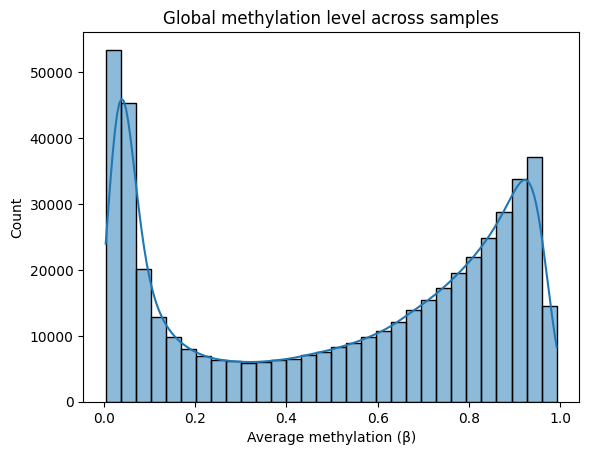

In [14]:
# Compute average beta per sample
means = raw_dataset.mean(axis=0)

sns.histplot(means, bins=30, kde=True)
plt.xlabel("Average methylation (β)")
plt.title("Global methylation level across samples")
plt.show()

### B. Heatmap of highly variable CpGs

**Purpose: show methylation patterns across a limited set of CpGs that distinguish tissues or cell type**

The heatmap of the top 100 CpG “outliers” (selected by per-CpG IQR-based deviation counts) reveals a heterogeneous, mosaic pattern of methylation across samples: many columns (CpGs) show recurrent extreme β-values across a subset of samples, while individual rows (samples) display sporadic outlying loci rather than wholesale shifts in global methylation. Such recurrent, sample-specific CpG outliers can mark **field defects** and loci enriched in cancerous transformation, and therefore merit prioritization. **[12]**
The outlier-selection strategy based on interquartile-range thresholds is a simple and commonly used heuristic to flag extreme methylation events, and it is appropriate here as an initial screen for candidate biomarkers. **[13]**
Promising individual CpGs should be aggregated and tested for regional consistency and recurrence across independent cohorts, as regional methods often yield more robust and biologically interpretable signals than isolated CpGs; loci that recur across multiple samples or cohorts are stronger early-detection candidates. **[14]**


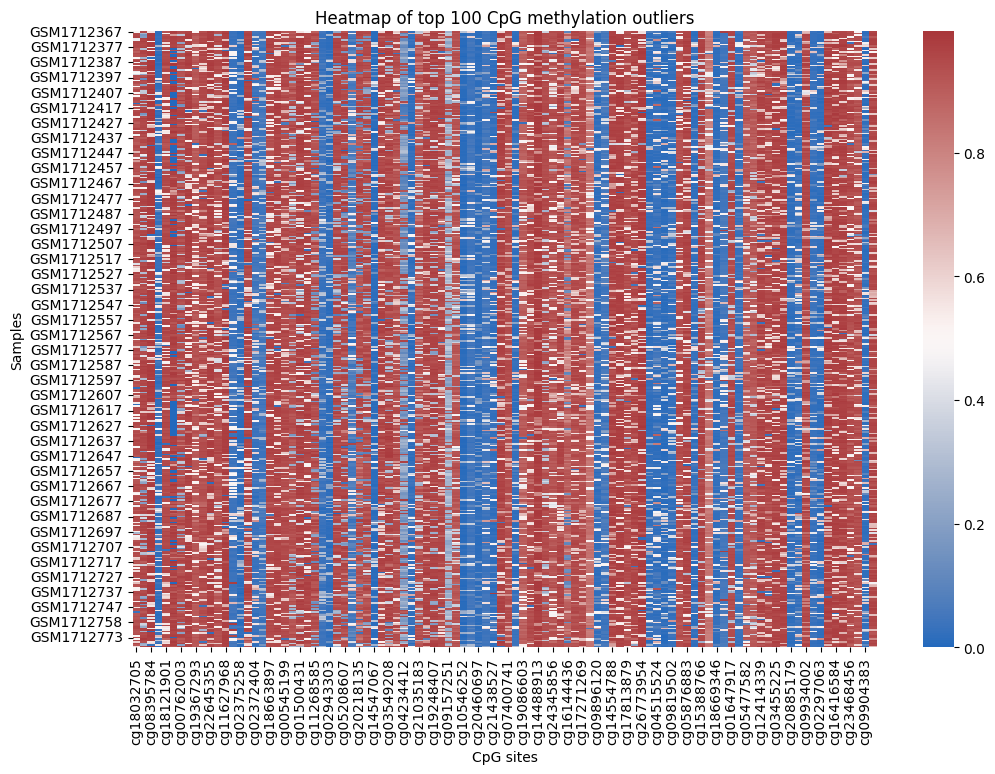

In [8]:
warnings.filterwarnings('ignore')

# Step 1: Identify outliers per CpG (e.g., > 3*IQR)
Q1 = raw_dataset.quantile(0.25)
Q3 = raw_dataset.quantile(0.75)
IQR = Q3 - Q1

# Boolean DataFrame: True where outlier
outliers = (raw_dataset < (Q1 - 3*IQR)) | (raw_dataset > (Q3 + 3*IQR))

# Subset top 100 outlier CpGs for visualization (to keep heatmap readable)
outlier_counts = outliers.sum().sort_values(ascending=False)
top_cpgs = outlier_counts.head(100).index

plt.figure(figsize=(12,8))
sns.heatmap(raw_dataset[top_cpgs], cmap="vlag", center=0.5)
plt.title("Heatmap of top 100 CpG methylation outliers")
plt.xlabel("CpG sites")
plt.ylabel("Samples")
plt.show()


### C. Volcano Plots

Volcano plots are effective for visualizing the relationship between statistical significance (p-value) and magnitude of change (fold change) in methylation levels. By plotting these two metrics, one can easily identify CpG sites that exhibit significant changes in methylation levels, which may serve as potential biomarkers for cancer detection

The displayed visualization is a volcano-like scatter plot designed to approximate the relationship between statistical significance and effect magnitude across CpG sites. On the x-axis, the maximum absolute z-score per CpG is used as a proxy for the magnitude of deviation in methylation, while the y-axis shows the negative logarithm of the corresponding approximated p-values. This type of plot is widely used in omics analyses because it helps highlight CpG loci with both strong effect sizes and high statistical significance—sites that may represent biologically meaningful outliers or potential biomarkers. Although the current implementation uses a rough approximation of p-values rather than those derived from formal hypothesis testing, it still serves as an exploratory screening tool to visually identify clusters, distribution patterns, and potential candidates for downstream validation. The compression of points along a narrow range on the y-axis suggests that the p-value estimation method may lack resolution, limiting interpretability; nevertheless, the plot remains helpful for gaining a first-pass overview of the most extreme methylation deviations across the dataset.


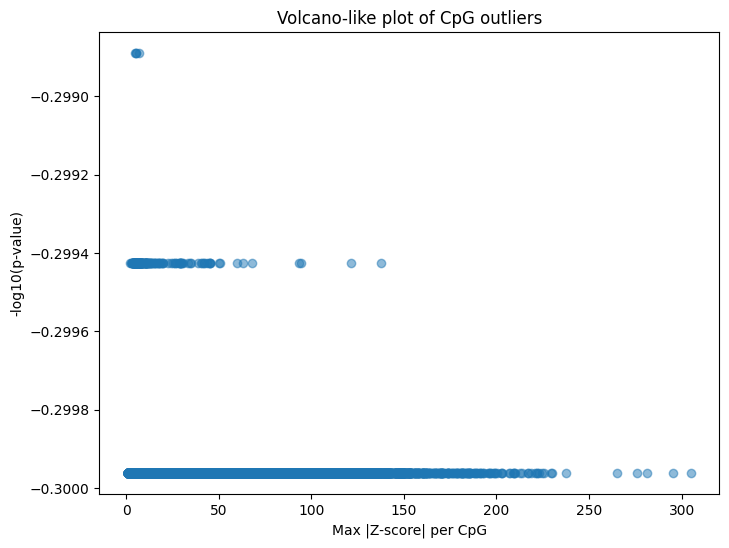

In [12]:
# Compute median per CpG
median = raw_dataset.median()

# Compute MAD per CpG (axis=0 → column-wise)
mad = raw_dataset.apply(lambda x: median_abs_deviation(x, scale='normal'), axis=0)

# Compute z-scores per CpG
z = (raw_dataset - median) / mad

# Rough approximation of p-values
p_values = 2 * (1 - np.abs(z).rank(axis=0)/len(z))

# Max absolute z per CpG
max_z = z.abs().max()

# Plot
plt.figure(figsize=(8,6))
plt.scatter(max_z, -np.log10(p_values.max()), alpha=0.5)
plt.xlabel("Max |Z-score| per CpG")
plt.ylabel("-log10(p-value)")
plt.title("Volcano-like plot of CpG outliers")
plt.show()


### D. Boxplots of Methylation Levels

Boxplots provide a clear representation of the distribution of methylation levels for individual CpG sites across different sample groups. They can highlight the presence of outliers and differences between conditions, aiding in the identification of CpG sites with aberrant methylation patterns associated with cancer.

The boxplot visualization displays the distribution of beta-values for the ten CpG sites exhibiting the highest number of detected outliers across the dataset. This representation is particularly informative because it allows direct comparison of variability, median methylation levels, and the extent of extreme observations for each CpG locus. The interquartile ranges and whiskers highlight how dispersion differs among CpGs, whereas the numerous individual dots lying outside the whiskers indicate substantial deviation in methylation that may reflect biologically relevant dysregulation. Some CpG sites show tightly clustered beta-values close to full methylation or unmethylation, while others exhibit wide spreads, suggesting potential heterogeneity among samples or subgroup-specific alterations. This plot is therefore useful for prioritizing CpG sites that may contribute to cancer-related epigenetic variation, especially when outlier burden aligns with known oncogenic mechanisms or occurs in regions of regulatory significance.

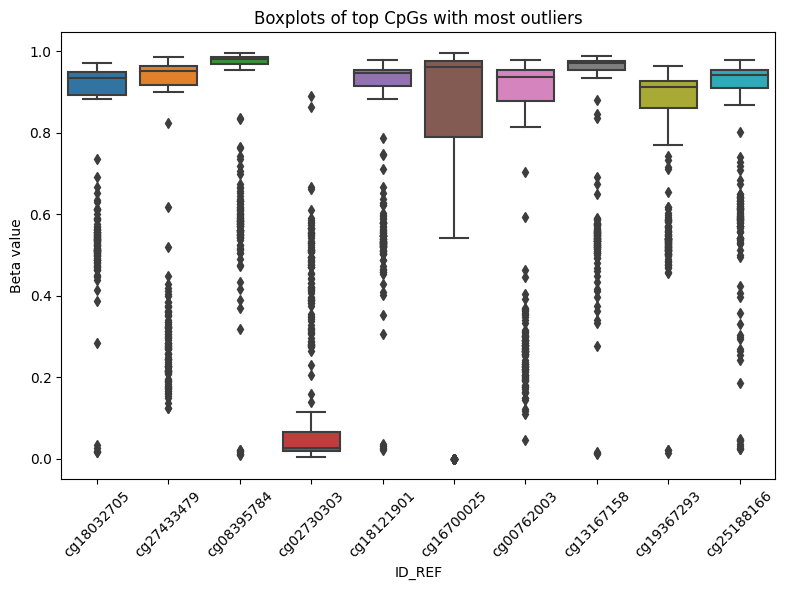

In [13]:
# Pick top 10 CpGs with most outliers
outlier_counts = outliers.sum().sort_values(ascending=False)
top_cpgs = outlier_counts.head(10).index

plt.figure(figsize=(8,6))
sns.boxplot(data=raw_dataset[top_cpgs])
plt.xticks(rotation=45)
plt.ylabel("Beta value")
plt.title("Boxplots of top CpGs with most outliers")
plt.tight_layout()
plt.show()

### E. Kernel Density Estimation (KDE) Plot of β-Value Distributions

A KDE plot (Kernel Density Estimation) is a continuous representation of the distribution of a variable. Unlike a histogram, which divides data into intervals, KDE estimates a smooth density function that shows where values are concentrated. It is particularly used to visualise the shape of the distribution and compare multiple groups or samples in an overlapping manner. In epigenetics, this type of visualisation is commonly used to analyse the distribution of methylation β-values.

The KDE visualization illustrates the distribution of β-values across a random subset of samples, allowing a direct comparison of global methylation patterns. The bimodal structure visible in most curves—characterized by peaks near 0 and 1—reflects the typical behavior of CpG methylation, where many loci tend to be either largely unmethylated or fully methylated. The relative alignment of the curves suggests that the overall methylation landscape is broadly consistent across samples in the subset, though slight deviations in the mid-range may indicate sample-specific variability or tissue heterogeneity. KDE plots are particularly useful in epigenomic data exploration because they provide a smooth and interpretable view of distributional differences without the discretization imposed by histograms, making them a standard choice for global quality assessment in methylation studies. **[10]** **[11]**


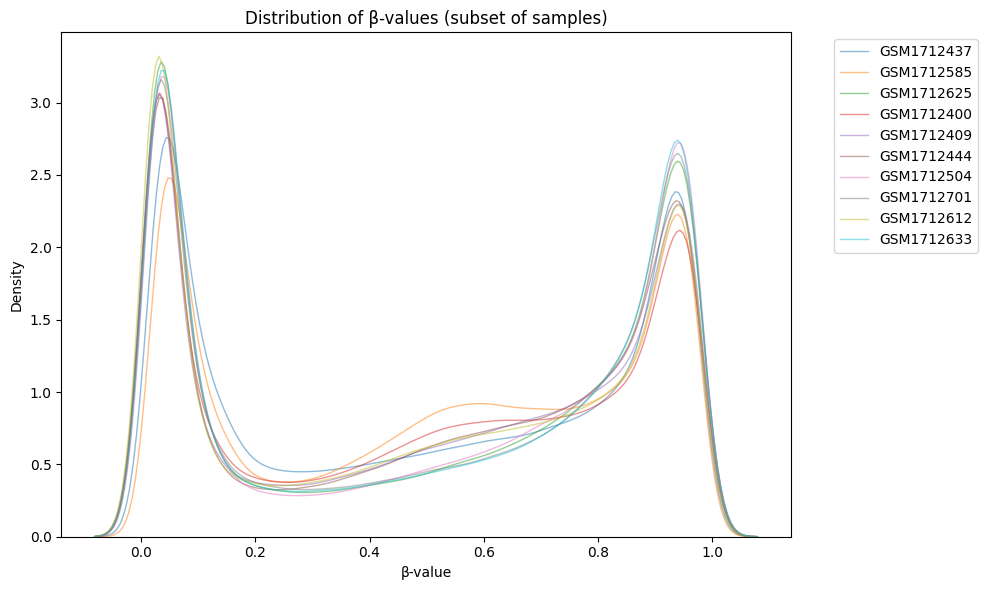

In [10]:
warnings.filterwarnings('ignore')

# Seleziona un sottoinsieme di campioni (righe)
subset_samples = raw_dataset.sample(n=10, axis=0, random_state=42)  # 10 campioni casuali

# Plot delle distribuzioni dei beta-values per ciascun campione
plt.figure(figsize=(10, 6))
for i, (idx, row) in enumerate(subset_samples.iterrows()):
    sns.kdeplot(row.dropna(), alpha=0.5, linewidth=1, label=idx)

plt.title('Distribution of β-values (subset of samples)')
plt.xlabel('β-value')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Conclusion

This notebook provides a **first-pass exploration of the methylation dataset**, outlining its structure, basic quality features, and coarse patterns across samples. Through global density (KDE) plots, preliminary boxplots for CpG sites with many extreme observations, and an illustrative volcano-like display, we obtain an initial sense of the range and shape of β-value distributions as well as loci that may warrant downstream scrutiny. At this stage, the figures should be regarded as exploratory rather than inferential: they were primarily used to familiarize ourselves with the data, check for obvious anomalies, and prototype simple prioritization criteria. I am not fully confident that these plots are the most informative for the thesis objectives; they served as scaffolding to start looking at the data. As the project progresses—and after a targeted review of methodological literature—more *purpose-built* visualizations will be generated (e.g., differential methylation volcano plots based on formal models) to better communicate biologically meaningful results.

A **possible direction** for future analysis—still at a conceptual stage—is the statistical characterization of stochastic processes underlying the three sample contexts (tumor, tumor-adjacent, and non-tumor). The idea would be to explore whether methylation profiles could, in principle, be viewed as samples drawn from distinct underlying distributions, potentially using approaches such as β- or mixture-β models, nonparametric two-sample tests (e.g., KS/AD tests, kernel MMD), or likelihood-based comparisons. Although this direction is not yet concretely defined, investigating distributional differences might help clarify whether certain CpG sites behave in a group-specific manner. If preliminary evidence were to support this hypothesis, such insights could eventually inform both visualization choices and more targeted strategies for outlier detection, potentially helping to highlight CpG loci of greater biological relevance. At the moment, this remains an open and exploratory idea rather than a confirmed methodological step.

## References

[1] National Institutes of Health (US) and Biological Sciences Curriculum Study, *Understanding Cancer*. Bethesda, MD, USA: National Institutes of Health (US), 2007. [Online]. Available: [https://www.ncbi.nlm.nih.gov/books/NBK20362/](https://www.ncbi.nlm.nih.gov/books/NBK20362/).

[2] D. Hanahan and R. A. Weinberg, “The hallmarks of cancer,” *Cell*, vol. 100, no. 1, pp. 57–70, Jan. 2000.

[3] G. Menon, F. M. Alkabban, and T. Ferguson, “Breast Cancer,” in *StatPearls* [Internet]. Treasure Island, FL, USA: StatPearls Publishing, Jan. 2025–. [Online]. Available: [https://www.ncbi.nlm.nih.gov/books/NBK482286/](https://www.ncbi.nlm.nih.gov/books/NBK482286/).

[4] A. Bird, “DNA methylation patterns and epigenetic memory,” *Genes & Development*, vol. 16, no. 1, pp. 6–21, Jan. 2002.

[5] J. J. S. Wilcox, J. Ord, D. Kappei, and T. I. Gossmann, “The CpG Landscape of Protein Coding DNA in Vertebrates,” *Evolutionary Applications*, 2025.

[6] National Center for Biotechnology Information, “GSE69914 on GEO Datasets,” *Gene Expression Omnibus (GEO)*, 2015. [Online]. Available: [https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE69914). 

[7] National Cancer Institute, “BRCA Gene Changes: Cancer Risk and Genetic Testing,” *National Institutes of Health*, Jul. 19, 2024. [Online]. Available: [https://www.cancer.gov/about-cancer/causes-prevention/genetics/brca-fact-sheet](https://www.cancer.gov/about-cancer/causes-prevention/genetics/brca-fact-sheet).

[8] M. Ehrlich, “DNA methylation in cancer: too much, but also too little,” *Oncogene*, vol. 21, no. 35, pp. 5400–5413, Aug. 2002.

[9] Zhou, W., Laird, P. W., & Shen, H. (2016). *Comprehensive characterization, annotation and innovative use of Infinium DNA methylation BeadChip probes*. Nucleic Acids Research, 45(4), e22. [https://doi.org/10.1093/nar/gkw967](https://doi.org/10.1093/nar/gkw967)

[10] P. Du, X. Zhang, C.-C. Huang, N. Jafari, W. A. Kibbe, L. Hou, and S. M. Lin, “Comparison of Beta-value and M-value methods for quantifying methylation levels by microarray analysis,” *BMC Bioinformatics*, vol. 11, p. 587, 2010.

[11] J. Maksimovic, L. Gordon, and A. Oshlack, “SWAN: Subset-quantile Within Array Normalization for Illumina Infinium HumanMethylation450 BeadChips,” *Genome Biology*, vol. 13, no. 6, p. R44, 2012. 

[12] Teschendorff, A. E., Gao, Y., Jones, A., et al., “DNA methylation outliers in normal breast tissue identify field defects that are enriched in cancer,” *Nature Communications*, vol. 7, Article 10478, 2016.

[13] F. Seeboth et al., “DNA methylation outlier burden, health and ageing in Generation Scotland and Lothian Birth Cohorts,” Clin. Epigenetics, vol. 12, no. 1, p. 103, 2020.

[14] G. Benelli, G. Franceschini, A. Magi, A. Romagnoli, U. Biagioni, G. Migliaccio, L. Malorni, and F. Demichelis, “Charting differentially methylated regions in cancer with Rocker-meth,” Commun. Biol., vol. 4, no. 1, p. 1249, Dec. 2021.